<a href="https://colab.research.google.com/github/Yatharth19/Face-Recognizer/blob/main/image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install PyWavelets
# !pip install opencv-python 
# !pip install seaborn

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

import pywt #py wavelet transform library

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
# %matplotlib inline

import pandas as pd

import seaborn as sn
from sklearn.metrics import confusion_matrix

In [3]:

img=cv2.imread('/content/drive/MyDrive/ml_celeb_classification/akshay_kumar/akshay kumar - Google Search/akk (19).jpg')
img.shape
# print(img)

(271, 500, 3)

In [4]:
# %cd;
# %cd -

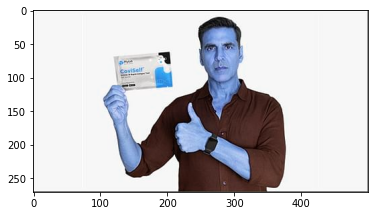

In [5]:
plt.imshow(img)

In [6]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(271, 500)

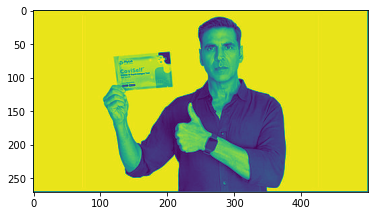

In [7]:
plt.imshow(gray)

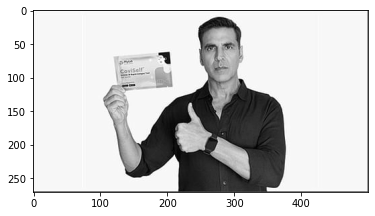

In [8]:
plt.imshow(gray,cmap='gray')

In [9]:
face_cascade=cv2.CascadeClassifier('/content/drive/MyDrive/ml_celeb_classification/CelebrityFaceRecognition_model_opencv_haarcascades/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('/content/drive/MyDrive/ml_celeb_classification/CelebrityFaceRecognition_model_opencv_haarcascades/haarcascade_eye.xml')
faces=face_cascade.detectMultiScale(gray, 1.1, 4)

# print(faces)
faces

# plt.imshow(gray)

array([[243,  28,  73,  73]], dtype=int32)

The above array contains values of x,y,width and height

In [10]:
(x,y,w,h)=faces[0]
x,y,w,h

(243, 28, 73, 73)

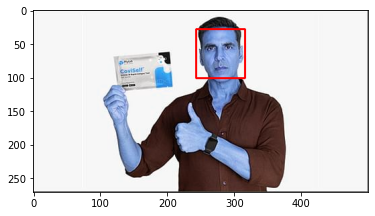

In [11]:

face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)   #Draw a red rectangle with given values
plt.imshow(face_img)

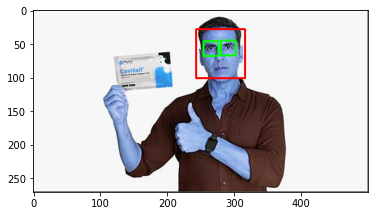

In [12]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
  face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  roi_gray=gray[y:y+h, x:x+w]
  roi_color=face_img[y:y+h, x:x+w]
  eyes= eye_cascade.detectMultiScale(roi_gray)
  for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

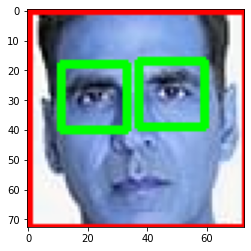

In [13]:
#%matplotlib inline     #required n jupyter but not here
plt.imshow(roi_color,cmap='gray')

In [14]:
def get_cropped_image_if_2_eyes(image_path):
  try:
    img=cv2.imread(image_path)
    # print(image_path)
    # plt.imshow(img)
    # if img_path=="/content/drive/MyDrive/ml_celeb_classification/akshay_kumar/akshay kumar - Google Search/akk (3).jpg":
    #   print("/content/drive/MyDrive/ml_celeb_classification/akshay_kumar/akshay kumar - Google Search/akk (3).jpg")
    # else:
    #   print('path not same')
  except:
    return None
  # gray=cv2.imread(image_path)
  try:
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  except:
    return None
  faces=face_cascade.detectMultiScale(gray,1.3,4)
  for (x,y,w,h) in faces:
    roi_gray=gray[y:y+h, x:x+w]
    roi_color=img[y:y+h, x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    if len(eyes)>=2:
      return roi_color

In [15]:
# cropped=get_cropped_image_if_2_eyes('/content/drive/MyDrive/ml_celeb_classification/akshay_kumar/akshay kumar - Google Search/akk (49).jpg')
# plt.imshow(cropped)

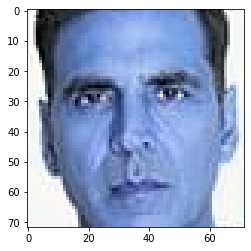

In [16]:
cropped_img=get_cropped_image_if_2_eyes('/content/drive/MyDrive/ml_celeb_classification/akshay_kumar/akshay kumar - Google Search/akk (19).jpg')
plt.imshow(cropped_img)

DON'T REDO THE BELOW CELLS

In [ ]:
!mkdir "/content/drive/MyDrive/Reduced_images"

mkdir: cannot create directory ‘/content/drive/MyDrive/Reduced_images’: File exists


In [ ]:
# path='/content/drive/MyDrive/ml_celeb_classification/aamir/aamir khan - Google Search'
path2="/content/drive/MyDrive/Reduced_images/akshay"
# !mkdir "/content/drive/MyDrive/Reduced_images"
!mkdir "/content/drive/MyDrive/Reduced_images/akshay"

# !cp img path2         #copy command
# print(img)
# plt.imshow(img)
  # print(i)
  # %matplotlib inline
  # plt.imshow(img)
  #print(img)
# img1=cv2.imread("/content/drive/MyDrive/ml_celeb_classification/akshay_kumar/akshay kumar - Google Search/akk (19).jpg")
# plt.imshow(img1)
# converted_img=get_cropped_image_if_2_eyes(path1)
 # !cp converted_img path2
  #plt.imshow(img)
# for items in path:
#   path_item=path+'/'+items
#   # print(path_item,end='    ')
#   # print(items)
#   cropped_img=get_cropped_image_if_2_eyes(path_item)
#   plt.imshow(cropped_img)

mkdir: cannot create directory ‘/content/drive/MyDrive/Reduced_images/akshay’: File exists


In [ ]:
!pwd

/content


In [ ]:
%cd /content/drive/MyDrive/Reduced_images/akshay

/content/drive/MyDrive/Reduced_images/akshay


In [ ]:
!pwd

/content/drive/MyDrive/Reduced_images/akshay


In [ ]:
path='/content/drive/MyDrive/ml_celeb_classification/akshay_kumar/akshay kumar - Google Search'

for i in range(1,55):
  k1='akk ('+str(i)+').jpg'
  path1=str(path+'/'+k1)
  # print(path1)
  try:
    img = cv2.imread(path1)
  except:
    continue;
  cropped_img=get_cropped_image_if_2_eyes(path1)
  if cropped_img is not None:
    # plt.imshow(cropped_img)
    cv2.imwrite("ak"+str(i)+".jpg",cropped_img)
  # print(type(img))
  

Test image


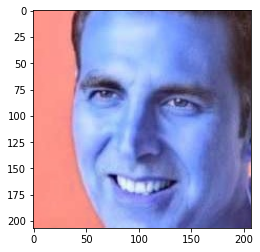

In [ ]:
img=cv2.imread('/content/drive/MyDrive/Reduced_images/akshay/ak16.jpg')
plt.imshow(img)

In [ ]:
# img =get_cropped_image_if_2_eyes('/content/drive/MyDrive/ml_celeb_classification/akshay_kumar/akshay kumar - Google Search/akk (3).jpg')
# if img is not None:
#   plt.imshow(img)
# else:
#   print('Tumse na ho payega')

In [ ]:
%cd /content/

/content


In [ ]:
!pwd

/content


Doing the same thing for other characters

In [ ]:
!mkdir "/content/drive/MyDrive/Reduced_images/aamir"

mkdir: cannot create directory ‘/content/drive/MyDrive/Reduced_images/aamir’: File exists


In [ ]:
%cd /content/drive/MyDrive/Reduced_images/aamir

/content/drive/MyDrive/Reduced_images/aamir


In [ ]:
!pwd

/content/drive/MyDrive/Reduced_images/aamir


In [ ]:
path='/content/drive/MyDrive/ml_celeb_classification/aamir/aamir khan - Google Search'

for i in range(1,55):
  k1='aak ('+str(i)+').jpg'
  path1=str(path+'/'+k1)
  # print(path1)
  try:
    img = cv2.imread(path1)
  except:
    continue;
  cropped_img=get_cropped_image_if_2_eyes(path1)
  if cropped_img is not None:
    # plt.imshow(cropped_img)
    cv2.imwrite("aak"+str(i)+".jpg",cropped_img)
  # print(type(img))
  

In [ ]:
%cd /content/

/content


In [ ]:
!mkdir "/content/drive/MyDrive/Reduced_images/virat"

mkdir: cannot create directory ‘/content/drive/MyDrive/Reduced_images/virat’: File exists


In [ ]:
%cd /content/drive/MyDrive/Reduced_images/virat/

/content/drive/MyDrive/Reduced_images/virat


In [ ]:
!pwd

/content/drive/MyDrive/Reduced_images/virat


In [ ]:
path='/content/drive/MyDrive/ml_celeb_classification/kohli/virat kohli - Google Search'

for i in range(1,55):
  k1='vk ('+str(i)+').jpg'
  path1=str(path+'/'+k1)
  # print(path1)
  try:
    img = cv2.imread(path1)
  except:
    continue;
  cropped_img=get_cropped_image_if_2_eyes(path1)
  if cropped_img is not None:
    # plt.imshow(cropped_img)
    cv2.imwrite("virat"+str(i)+".jpg",cropped_img)
  # print(type(img))
  

In [ ]:
%cd /content/

/content


In [ ]:
!pwd

/content


In [ ]:
!mkdir "/content/drive/MyDrive/Reduced_images/msd"

mkdir: cannot create directory ‘/content/drive/MyDrive/Reduced_images/msd’: File exists


In [ ]:
%cd /content/drive/MyDrive/Reduced_images/msd

/content/drive/MyDrive/Reduced_images/msd


In [ ]:
!pwd

/content/drive/MyDrive/Reduced_images/msd


In [ ]:
path='/content/drive/MyDrive/ml_celeb_classification/msd/ms dhoni - Google Search'

for i in range(1,55):
  k1='msd ('+str(i)+').jpg'
  path1=str(path+'/'+k1)
  # print(path1)
  try:
    img = cv2.imread(path1)
  except:
    continue;
  cropped_img=get_cropped_image_if_2_eyes(path1)
  if cropped_img is not None:
    # plt.imshow(cropped_img)
    cv2.imwrite("msd"+str(i)+".jpg",cropped_img)
  # print(type(img))
  

In [ ]:
%cd /content/

/content


In [ ]:
!pwd

/content


In [ ]:
!mkdir "/content/drive/MyDrive/Reduced_images/rohit"

mkdir: cannot create directory ‘/content/drive/MyDrive/Reduced_images/rohit’: File exists


In [ ]:
%cd /content/drive/MyDrive/Reduced_images/rohit

/content/drive/MyDrive/Reduced_images/rohit


In [ ]:
path='/content/drive/MyDrive/ml_celeb_classification/sharma_rohit/rohit sharma - Google Search'

for i in range(1,55):
  k1='rs ('+str(i)+').jpg'
  path1=str(path+'/'+k1)
  # print(path1)
  try:
    img = cv2.imread(path1)
  except:
    continue;
  cropped_img=get_cropped_image_if_2_eyes(path1)
  if cropped_img is not None:
    # plt.imshow(cropped_img)
    cv2.imwrite("rohit"+str(i)+".jpg",cropped_img)
  # print(type(img))
  

In [ ]:
!mkdir "/content/drive/MyDrive/Reduced_images/myself"

%cd /content/drive/MyDrive/Reduced_images/myself/

path='/content/drive/MyDrive/pics'

# /content/drive/MyDrive/pics/opencv_frame_0.png

for i in range(0,209):
  k1='opencv_frame_'+str(i)+'.png'
  path1=str(path+'/'+k1)
  # print(path1)
  try:
    img = cv2.imread(path1)
  except:
    continue;
  cropped_img=get_cropped_image_if_2_eyes(path1)
  if cropped_img is not None:
    # plt.imshow(cropped_img)
    cv2.imwrite("me"+str(i)+".png",cropped_img)
  # print(type(img))
  
%cd /content/

/content/drive/MyDrive/Reduced_images/myself
/content


In [ ]:
!mkdir "/content/drive/MyDrive/Reduced_images/mommy"

%cd /content/drive/MyDrive/Reduced_images/mommy/

path='/content/drive/MyDrive/poonam'

# /content/drive/MyDrive/pics/opencv_frame_0.png

for i in range(0,209):
  k1='opencv_frame_'+str(i)+'.png'
  path1=str(path+'/'+k1)
  # print(path1)
  try:
    img = cv2.imread(path1)
  except:
    continue;
  cropped_img=get_cropped_image_if_2_eyes(path1)
  if cropped_img is not None:
    # plt.imshow(cropped_img)
    cv2.imwrite("me"+str(i)+".png",cropped_img)
  # print(type(img))
  
%cd /content/

/content/drive/MyDrive/Reduced_images/mommy
/content


NOW YOU CAN REDO THE BELOW CELLS

Creating a dictionary to access every image under the name of each player

In [17]:
dict1={}
#  our key values are aamir,akshay,virat,msd,rohit
path='/content/drive/MyDrive/Reduced_images'
l=['aamir','akshay','msd','rohit','virat']
l1=['aak','ak','msd','rohit','virat']
path_list=list()
for i in range(0,len(l)):
  # for sub_name in l1:
  path_list=list()
  name=l[i]
  sub_name=l1[i]
  path1=str(path+'/'+name+'/'+sub_name)
  for i in range(1,55):
    final_path=str(path1+str(i)+'.jpg')
    # print(final_path)
    img=cv2.imread(final_path)
    if img is None:
      continue
    # print(final_path)
    path_list.append(final_path)
  
  # path_list.clear()
  dict1[name]=path_list
  # path_list.clear()
  # print(name)

In [18]:
# dict1={}
path='/content/drive/MyDrive/Reduced_images'
path_list=list()
# for i in range(0,len(l)):
  # for sub_name in l1:

name1=['myself','mommy']
sub_name1=['me','mom']

for i in range(0,len(name1)):
  name=name1[i]
  sub_name=sub_name1[i]
  path_list=list()
  path1=str(path+'/'+name+'/'+sub_name)
  for i in range(0,208):
    final_path=str(path1+str(i)+'.png')
    # print(final_path)
    img=cv2.imread(final_path)
    if img is None:
      continue
    # print(final_path)
    path_list.append(final_path)

  # path_list.clear()
  dict1[name]=path_list
  # path_list.clear()
  # print(name)

In [19]:
print(dict1)

{'aamir': ['/content/drive/MyDrive/Reduced_images/aamir/aak1.jpg', '/content/drive/MyDrive/Reduced_images/aamir/aak3.jpg', '/content/drive/MyDrive/Reduced_images/aamir/aak4.jpg', '/content/drive/MyDrive/Reduced_images/aamir/aak6.jpg', '/content/drive/MyDrive/Reduced_images/aamir/aak8.jpg', '/content/drive/MyDrive/Reduced_images/aamir/aak13.jpg', '/content/drive/MyDrive/Reduced_images/aamir/aak14.jpg', '/content/drive/MyDrive/Reduced_images/aamir/aak15.jpg', '/content/drive/MyDrive/Reduced_images/aamir/aak16.jpg', '/content/drive/MyDrive/Reduced_images/aamir/aak18.jpg', '/content/drive/MyDrive/Reduced_images/aamir/aak21.jpg', '/content/drive/MyDrive/Reduced_images/aamir/aak22.jpg', '/content/drive/MyDrive/Reduced_images/aamir/aak25.jpg', '/content/drive/MyDrive/Reduced_images/aamir/aak27.jpg', '/content/drive/MyDrive/Reduced_images/aamir/aak28.jpg', '/content/drive/MyDrive/Reduced_images/aamir/aak32.jpg', '/content/drive/MyDrive/Reduced_images/aamir/aak35.jpg', '/content/drive/MyDrive/R

In [20]:
len(dict1['myself'])

163

In [21]:
len(dict1['mommy'])

0

NOW WE DO WAVELET TRANSFORMATION, IT IS USED TO EXTRACT IMPORTANT FEATURES IN AN IMAGE

In [22]:
def w2d(img,mode='haar',level=1):
  imArray=img
  #Convert to grayscale
  imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
  #convert to float
  imArray=np.float32(imArray)
  imArray/=255
  #compute coefficients
  coeffs=pywt.wavedec2(imArray,mode,level=level)

  #Process coefficients
  coeffs_H=list(coeffs)
  coeffs_H[0]*=0

  #reconstruction
  imArray_H=pywt.waverec2(coeffs_H,mode);
  imArray_H*=255;
  imArray_H=np.uint8(imArray_H)

  return imArray_H

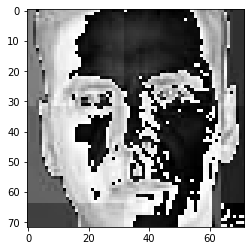

In [23]:
im_har=w2d(cropped_img,'db1',5)
plt.imshow(im_har,cmap='gray')

In [24]:
im_har.shape

(72, 72)

In [25]:
dict1

{'aamir': ['/content/drive/MyDrive/Reduced_images/aamir/aak1.jpg',
  '/content/drive/MyDrive/Reduced_images/aamir/aak3.jpg',
  '/content/drive/MyDrive/Reduced_images/aamir/aak4.jpg',
  '/content/drive/MyDrive/Reduced_images/aamir/aak6.jpg',
  '/content/drive/MyDrive/Reduced_images/aamir/aak8.jpg',
  '/content/drive/MyDrive/Reduced_images/aamir/aak13.jpg',
  '/content/drive/MyDrive/Reduced_images/aamir/aak14.jpg',
  '/content/drive/MyDrive/Reduced_images/aamir/aak15.jpg',
  '/content/drive/MyDrive/Reduced_images/aamir/aak16.jpg',
  '/content/drive/MyDrive/Reduced_images/aamir/aak18.jpg',
  '/content/drive/MyDrive/Reduced_images/aamir/aak21.jpg',
  '/content/drive/MyDrive/Reduced_images/aamir/aak22.jpg',
  '/content/drive/MyDrive/Reduced_images/aamir/aak25.jpg',
  '/content/drive/MyDrive/Reduced_images/aamir/aak27.jpg',
  '/content/drive/MyDrive/Reduced_images/aamir/aak28.jpg',
  '/content/drive/MyDrive/Reduced_images/aamir/aak32.jpg',
  '/content/drive/MyDrive/Reduced_images/aamir/aak35

In [26]:
dict_name={}
count=0
for celebrity_name in dict1.keys():
  dict_name[celebrity_name]=count
  count+=1
dict_name

{'aamir': 0,
 'akshay': 1,
 'mommy': 6,
 'msd': 2,
 'myself': 5,
 'rohit': 3,
 'virat': 4}

In [27]:
X=[]
y=[]
for celebrity_name,training_files in dict1.items():
  for training_image in training_files:
    img=cv2.imread(training_image)
    scaled_raw_img=cv2.resize(img,(32,32))
    img_har=w2d(img,'db1',5)
    scaled_img_har=cv2.resize(img_har,(32,32))
    combined_img=np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
    X.append(combined_img)
    y.append(dict_name[celebrity_name])


In [28]:
len(X[0])

4096

In [29]:
X=np.array(X).reshape(len(X),4096).astype(float)#So that it does not give any error to us
X.shape

(254, 4096)

In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.5,random_state=5)

pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(X_train,Y_train)
print(pipe.score(X_train,Y_train))
pipe.score(X_test,Y_test)

1.0


0.7874015748031497

In [31]:
print(classification_report(Y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.32      0.91      0.48        11
           1       0.67      0.40      0.50        10
           2       1.00      0.10      0.18        10
           3       0.00      0.00      0.00         5
           4       0.67      0.50      0.57        12
           5       0.99      1.00      0.99        79

    accuracy                           0.79       127
   macro avg       0.61      0.48      0.45       127
weighted avg       0.84      0.79      0.77       127



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NOW USING GRIDSEARCH TO TRY DIFFERENT MODELS

In [32]:
model_params={
    'svm':{
        'model':svm.SVC(gamma='auto',probability=True),
        'params':{
            'svc__C':[1,10,100,1000],
            'svc__kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'logisticregression__C':[1,5,10]
        }
    }
}

In [33]:
scores=[]
best_estimators={}
for algo,mp in model_params.items():
  pipe=make_pipeline(StandardScaler(),mp['model'])
  clf=GridSearchCV(pipe,mp['params'],cv=5,return_train_score=False)
  clf.fit(X_train,Y_train)
  scores.append({
      'model':algo,
      'best_score':clf.best_score_,
      'best_params':clf.best_params_
  })
  best_estimators[algo]=clf.best_estimator_

df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


,model,best_score,best_params
0,svm,0.881538,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.826769,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.850154,{'logisticregression__C': 5}


In [34]:
final_model=svm.SVC(kernel='linear',C='1',gamma='auto',probability=True)

In [35]:
best_clf=best_estimators['svm']

In [36]:
type(best_clf)

sklearn.pipeline.Pipeline

In [37]:
type(final_model)

sklearn.svm._classes.SVC

Text(69.0, 0.5, 'Truth')

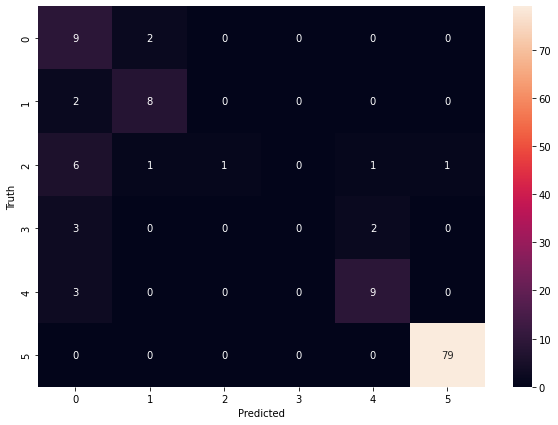

In [38]:
cm=confusion_matrix(Y_test,best_clf.predict(X_test))
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [39]:
best_clf.fit(X_train,Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=1, gamma='auto', kernel='linear', probability=True))])

In [40]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


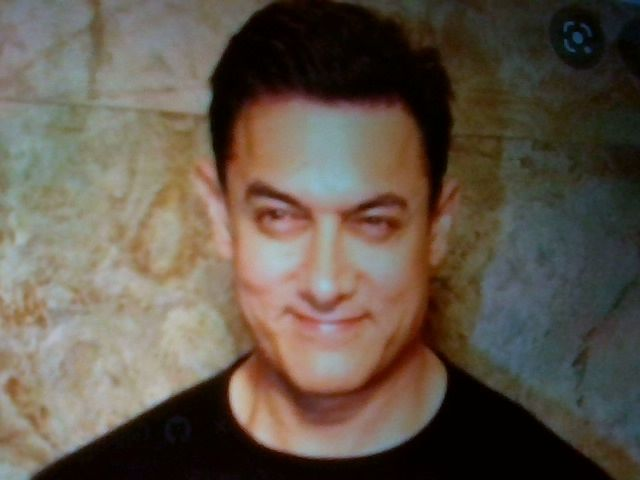

In [98]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [99]:
test_img=cv2.imread('/content/photo.jpg')

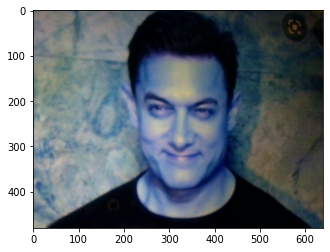

In [100]:
plt.imshow(test_img)

In [101]:
test_converted_img=get_cropped_image_if_2_eyes('/content/photo.jpg')

In [102]:
print(test_converted_img)

[[[ 88 104 121]
  [ 84 100 116]
  [ 83  99 112]
  ...
  [  1  10  23]
  [  1  17  29]
  [  2  22  33]]

 [[ 93 111 128]
  [ 90 109 124]
  [ 91 108 121]
  ...
  [  0   7  20]
  [  0  14  26]
  [  0  19  30]]

 [[ 93 114 129]
  [ 91 113 125]
  [ 91 111 122]
  ...
  [  0   7  20]
  [  0  13  25]
  [  0  20  31]]

 ...

 [[163 161 160]
  [160 161 159]
  [156 161 160]
  ...
  [  3   4  18]
  [  1   3  14]
  [  0   2  13]]

 [[162 163 159]
  [160 163 161]
  [160 163 161]
  ...
  [  2   3  17]
  [  0   2  13]
  [  0   1  11]]

 [[160 164 158]
  [160 164 159]
  [161 165 160]
  ...
  [  0   2  16]
  [  0   0  11]
  [  0   0   9]]]


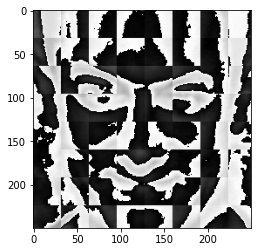

In [103]:
final_test=w2d(test_converted_img,'db1',5)
plt.imshow(final_test,cmap='gray')

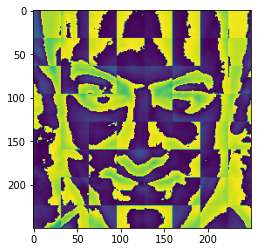

In [104]:
plt.imshow(final_test)

In [105]:
def extract_all_features(final_test):
  # for celebrity_name,training_files in dict1.items():
  #   for training_image in training_files:
  img=cv2.imread(final_test)
  scaled_raw_img=cv2.resize(img,(32,32))
  img_har=w2d(img,'db1',5)
  scaled_img_har=cv2.resize(img_har,(32,32))
  combined_img=np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
      # X.append(combined_img)
      # y.append(dict_name[celebrity_name])
  return combined_img

In [106]:
# best_clf.fit(X_train,Y_train)

In [107]:
final_test=extract_all_features('photo.jpg')

In [108]:
y_f=best_clf.predict([X[100]])


In [109]:
type(y_f)

numpy.ndarray

In [110]:
type(X_test)

numpy.ndarray

In [111]:
X[100].shape

(4096,)

In [112]:
y_f.shape

(1,)

In [113]:

print(y_f)

[5]


In [114]:
print(X_test)

[[200. 205. 202. ...   2.  40.   4.]
 [  4.  10.  29. ...  37.  48.  34.]
 [ 61.  60.  58. ...  48.  17.  64.]
 ...
 [241. 242. 238. ...  57.   0.   0.]
 [ 48.  44.  46. ... 254.   0. 159.]
 [ 61.  65.  60. ... 166.   1.   3.]]


In [115]:
final_test.shape

(4096, 1)

In [116]:
final_test

array([[117],
       [119],
       [117],
       ...,
       [236],
       [244],
       [249]], dtype=uint8)

In [117]:
final_test1=final_test.ravel()

In [118]:
final_test1

array([117, 119, 117, ..., 236, 244, 249], dtype=uint8)

In [119]:
X[0]

array([ 81.,  85.,  83., ...,  13., 199., 221.])

In [120]:
ans=best_clf.predict([final_test1])

In [121]:
print(ans)

[0]


In [122]:
# l=['aamir','akshay','msd','rohit','virat','myself']


In [123]:
if(ans==0):
  print('Aamir present!')
elif(ans==1):
  print('Akshay present!')
elif(ans==2):
  print('MSD present!')
elif(ans==3):
  print('rohit present!')
elif(ans==4):
  print('virat present!')
else :
  print('Greetings my lord!')

Aamir present!
